In [1]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ACCIDENTES

In [20]:
#leemos el archivo csv limpio que se utilizara en el analisis
df_acc = pd.read_csv("Accidentes_2000_al_actual.csv")

In [10]:
#Se elimina la columna 'Unnamed: 0'porque no es util para el analisis
df_acc=df_acc.drop(['Unnamed: 0'],axis=1 )

REVISION DE DATOS

In [11]:
#se revisan las columnas
df_acc.head()

,total_abordo,pasajeros_abordo,personal_abordo,total_fallecidos,pasajeros_fallecidos,personal_fallecido,year
0,16,13.0,3.0,1,1.0,0.0,2000
1,10,7.0,3.0,10,7.0,3.0,2000
2,41,38.0,3.0,22,21.0,1.0,2000
3,20,17.0,3.0,5,4.0,1.0,2000
4,179,169.0,10.0,169,159.0,10.0,2000


In [12]:
df_acc.tail()

,total_abordo,pasajeros_abordo,personal_abordo,total_fallecidos,pasajeros_fallecidos,personal_fallecido,year
755,6,5.0,1.0,5,4.0,1.0,2021
756,11,7.0,4.0,11,7.0,4.0,2021
757,14,12.0,2.0,12,11.0,1.0,2021
758,96,88.0,8.0,50,NaN,NaN,2021
759,28,22.0,6.0,28,22.0,6.0,2021


In [13]:
#se observan los tipos de datos
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_abordo          760 non-null    int64  
 1   pasajeros_abordo      744 non-null    float64
 2   personal_abordo       743 non-null    float64
 3   total_fallecidos      760 non-null    int64  
 4   pasajeros_fallecidos  740 non-null    float64
 5   personal_fallecido    740 non-null    float64
 6   year                  760 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 41.7 KB


Conversion de tipos de datos

In [17]:
# Convertir las columnas a tipo de dato numérico, manteniendo NaN
df_acc['pasajeros_abordo'] = df_acc['pasajeros_abordo'].astype(pd.Int64Dtype())
df_acc['personal_abordo'] = df_acc['personal_abordo'].astype(pd.Int64Dtype())
df_acc['pasajeros_fallecidos'] = df_acc['pasajeros_fallecidos'].astype(pd.Int64Dtype())
df_acc['personal_fallecido'] = df_acc['personal_fallecido'].astype(pd.Int64Dtype())
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   total_abordo          760 non-null    int64
 1   pasajeros_abordo      744 non-null    Int64
 2   personal_abordo       743 non-null    Int64
 3   total_fallecidos      760 non-null    int64
 4   pasajeros_fallecidos  740 non-null    Int64
 5   personal_fallecido    740 non-null    Int64
 6   year                  760 non-null    int64
dtypes: Int64(4), int64(3)
memory usage: 44.7 KB


Revision de nulos

In [19]:
#Se mantienen los nulos porque se consideran necesarios para el analisis ya que la cantidad de fallecidos totales no presenta nulos
df_acc.isnull().sum()

total_abordo             0
pasajeros_abordo        16
personal_abordo         17
total_fallecidos         0
pasajeros_fallecidos    20
personal_fallecido      20
year                     0
dtype: int64

ANALISIS ARCHIVO ORIGINAL

In [89]:
report = pd.read_csv("AccidentesAviones.csv")

In [23]:
report.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [90]:
#eliminamos las columnas que no vamos a usar
report.drop(columns=['Unnamed: 0', 'flight_no', 'registration', 'cn_ln', 'ground', 'summary','route','HORA declarada', 'ac_type','OperadOR'], inplace=True)

In [91]:
#se separa el año en una columna aparte
report["year"] = pd.to_datetime(report["fecha"]).dt.year

In [92]:
#se le da formato a la fecha
report['fecha'] = pd.to_datetime(report['fecha'], format='%B %d, %Y')

In [93]:
#para no eliminar datos se reemplazan los '?' por np.nan
report = report.replace(to_replace="?", value=np.nan)

In [94]:
report.reset_index(drop=True, inplace=True)

In [95]:
#se renombran las columnas
report = report.rename(columns={'all_aboard': 'total_abordo', 'PASAJEROS A BORDO': 'pasajeros_abordo',
                                'crew_aboard' : 'personal_abordo','cantidad de fallecidos':'total_fallecidos',
                                'passenger_fatalities' :'pasajeros_fallecidos', 'crew_fatalities':'personal_fallecido','year':'anio','Ruta':'ruta'})

In [96]:
report.head()

,fecha,ruta,total_abordo,pasajeros_abordo,personal_abordo,total_fallecidos,pasajeros_fallecidos,personal_fallecido,anio
0,1908-09-17,"Fort Myer, Virginia",2,1,1,1,1,0,1908
1,1909-09-07,"Juvisy-sur-Orge, France",1,0,1,1,0,0,1909
2,1912-07-12,"Atlantic City, New Jersey",5,0,5,5,0,5,1912
3,1913-08-06,"Victoria, British Columbia, Canada",1,0,1,1,0,1,1913
4,1913-09-09,Over the North Sea,20,NaN,NaN,14,NaN,NaN,1913


Variables Graficadas

In [107]:
# Extraer el año de la fecha y calcular la década
report['decada'] = (report['fecha'].dt.year // 10) * 10

# Contar la cantidad de accidentes por década
conteo_por_decada = report['decada'].value_counts().sort_index()

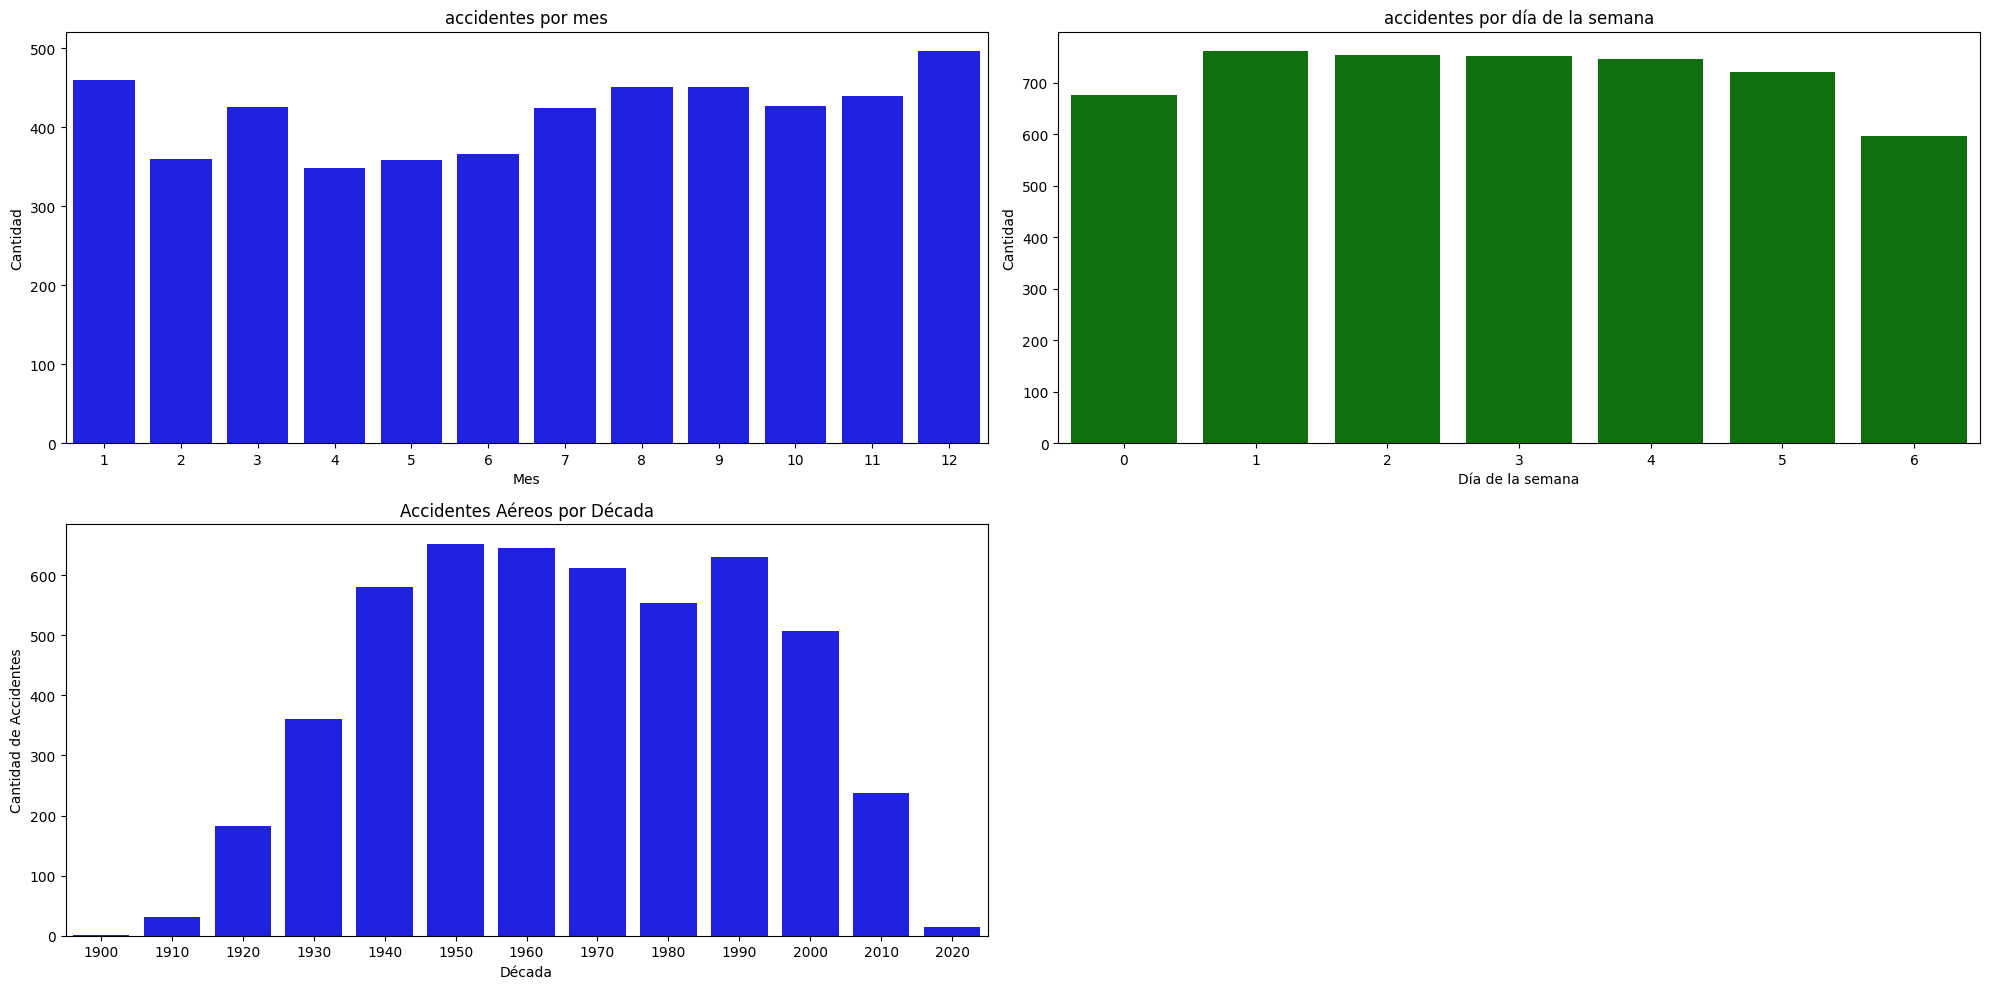

In [113]:
# Crear el gráfico
plt.figure(figsize=(20, 10))

# Subplot 1: Count plot para los meses de la columna fecha
plt.subplot(2, 2, 1)  
sns.countplot(x=report['fecha'].dt.month,color="blue" )
plt.title('accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los dias de la semana
plt.subplot(2, 2, 2)  
sns.countplot(x=report['fecha'].dt.dayofweek,color="green")
plt.title('accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 3: Gráfico de barras que muestra la cantidad de accidentes por década
plt.subplot(2, 2, 3)
conteo_por_decada = report['decada'].value_counts().sort_index()
sns.barplot(x=conteo_por_decada.index, y=conteo_por_decada.values, color="blue")
plt.title('Accidentes Aéreos por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Accidentes')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()